<a href="https://colab.research.google.com/github/aneeshghisad/BTech-Project/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

path = '/content/drive/MyDrive/milknew.csv'
df = pd.read_csv(path)
df.head()


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [5]:
df = df.drop(['Fat ','Taste'], axis=1)
df.head()



,pH,Temprature,Odor,Turbidity,Colour,Grade
0,6.6,35,0,0,254,high
1,6.6,36,1,1,253,high
2,8.5,70,1,1,246,low
3,9.5,34,1,1,255,low
4,6.6,37,0,0,255,medium


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Odor        1059 non-null   int64  
 3   Turbidity   1059 non-null   int64  
 4   Colour      1059 non-null   int64  
 5   Grade       1059 non-null   object 
dtypes: float64(1), int64(4), object(1)
memory usage: 49.8+ KB


In [7]:
df.describe()


,pH,Temprature,Odor,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.432483,0.491029,251.840415
std,1.399679,10.098364,0.495655,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,0.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,255.000000


In [16]:
print(df.columns.tolist())


['pH', 'Temprature', 'Taste', 'Odor', 'Turbidity', 'Colour', 'Grade']


['high' 'low' 'medium']
[0 0 1 1 2 0 1 1 1 2]
Accuracy: 0.9716981132075472

Classification Report:
               precision    recall  f1-score   support

        high       0.97      0.91      0.94        76
         low       0.99      0.99      0.99       115
      medium       0.95      0.99      0.97       127

    accuracy                           0.97       318
   macro avg       0.97      0.96      0.97       318
weighted avg       0.97      0.97      0.97       318



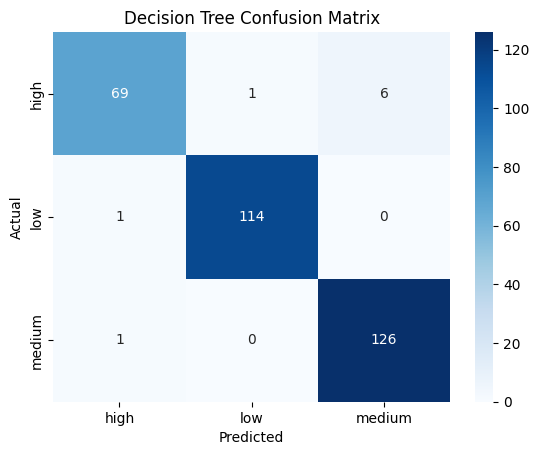

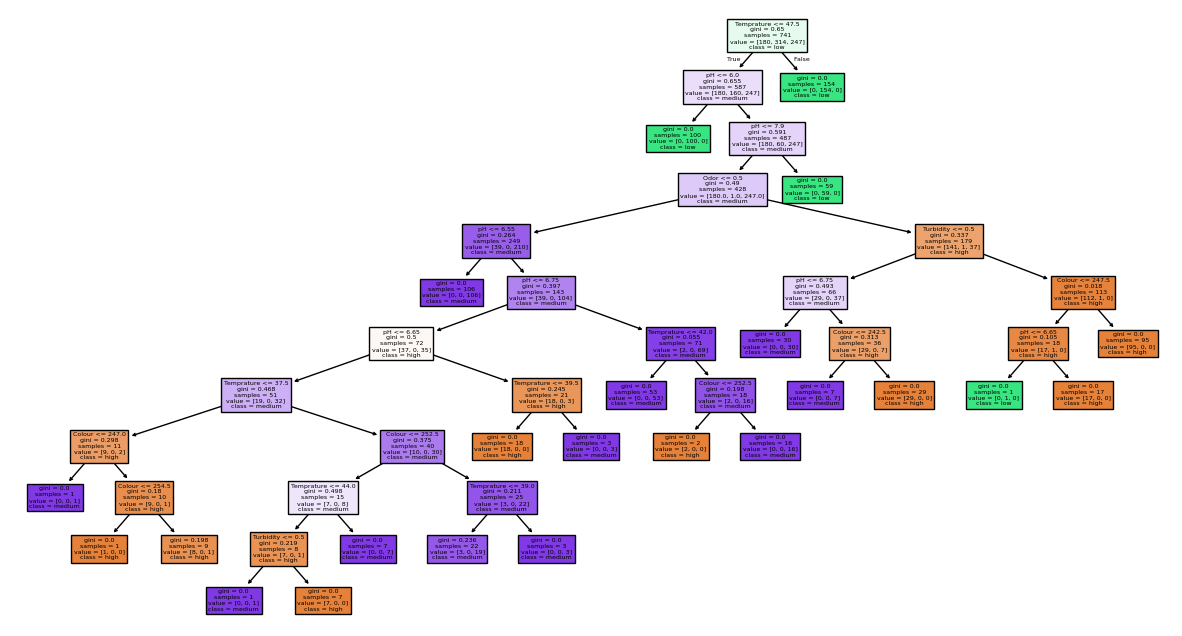

In [8]:
X = df.drop('Grade', axis=1)
y = df['Grade']
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)


print(le.classes_)
print(y[:10])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()
from sklearn import tree
plt.figure(figsize=(15,8))
tree.plot_tree(dt, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.show()


